## Epilepsy Awareness / Purple day 

In [18]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os # accessing directory structure

In [19]:
Epilepsy = pd.read_csv('epilepsy.csv')
Epilepsy.head(30)

,Unnamed: 0,treatment,base,age,seizure.rate,period,subject
0,1,placebo,11,31,5,1,1
1,110,placebo,11,31,3,2,1
2,112,placebo,11,31,3,3,1
3,114,placebo,11,31,3,4,1
4,2,placebo,11,30,3,1,2
5,210,placebo,11,30,5,2,2
6,212,placebo,11,30,3,3,2
7,214,placebo,11,30,3,4,2
8,3,placebo,6,25,2,1,3
9,310,placebo,6,25,4,2,3


In [20]:
Prediction_Epilepsy = pd.read_csv("data.csv")
Prediction_Epilepsy.head(30)


,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
5,X14.V1.56,55,28,18,16,16,19,25,40,52,...,-12,-31,-42,-54,-60,-64,-60,-56,-55,5
6,X3.V1.191,-55,-9,52,111,135,129,103,72,37,...,-125,-99,-79,-62,-41,-26,11,67,128,4
7,X11.V1.273,1,-2,-8,-11,-12,-17,-15,-16,-18,...,-79,-91,-97,-88,-76,-72,-66,-57,-39,2
8,X19.V1.874,-278,-246,-215,-191,-177,-167,-157,-139,-118,...,-400,-379,-336,-281,-226,-174,-125,-79,-40,1
9,X3.V1.491,8,15,13,3,-6,-8,-5,4,25,...,49,31,11,-5,-17,-19,-15,-15,-11,4


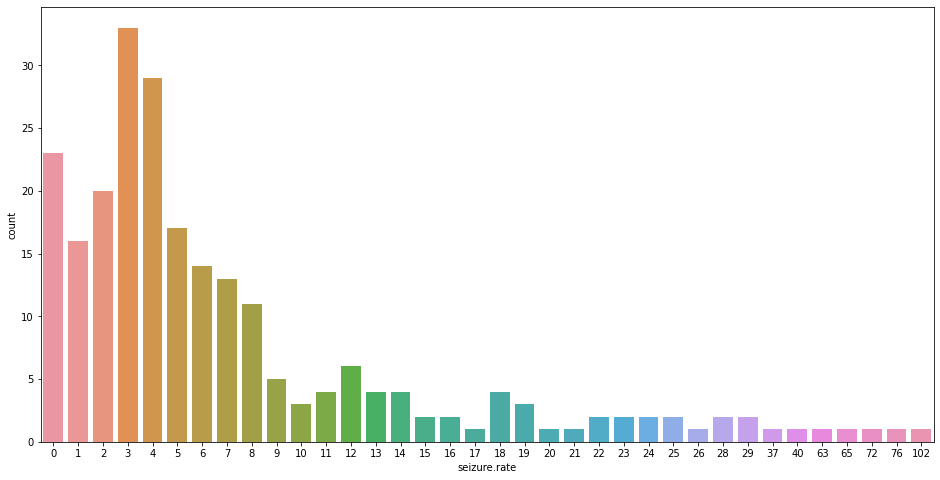

In [21]:
plt.figure(figsize=(16, 8))
sns.countplot(x='seizure.rate',data=Epilepsy)
plt.show()

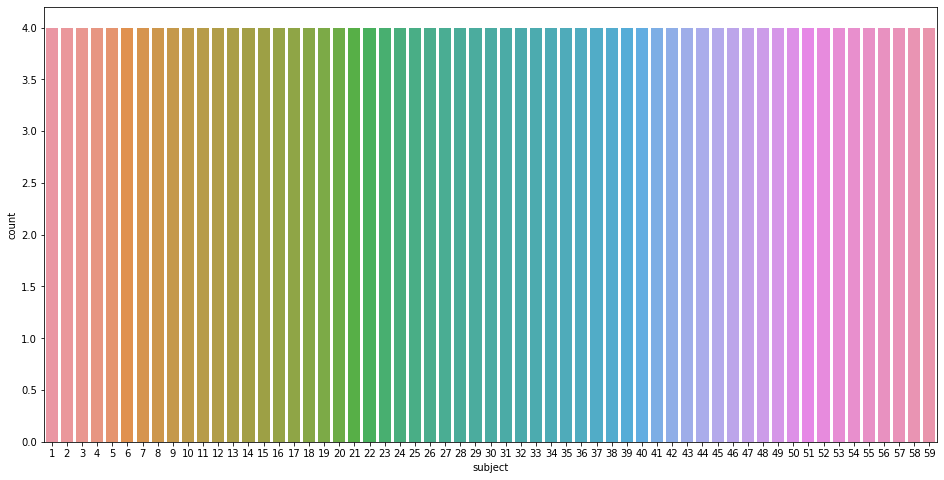

In [22]:
plt.figure(figsize=(16, 8))
sns.countplot(x='subject',data=Epilepsy)
plt.show()

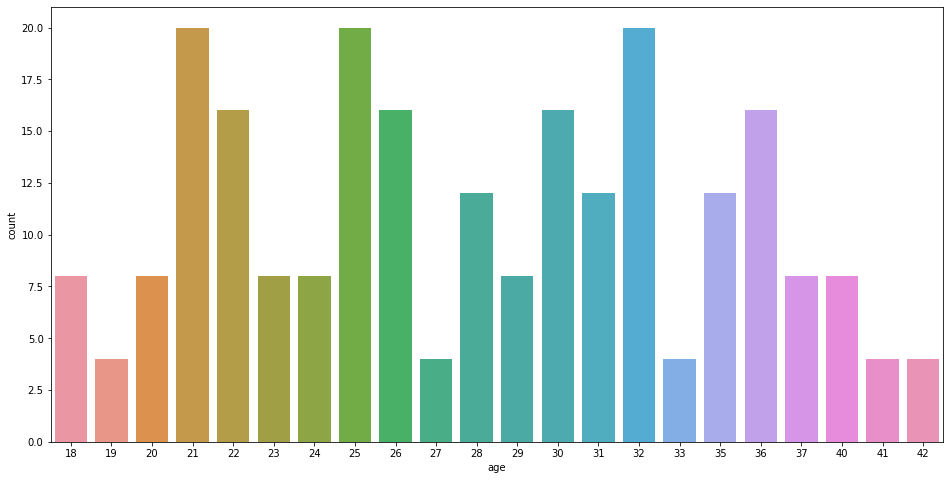

In [23]:
plt.figure(figsize=(16, 8))
sns.countplot(x='age',data=Epilepsy)
plt.show()


In [31]:
Epilepsy_seizure_rate = np.array(pd.read_csv('epilepsy.csv')['seizure.rate'])


In [33]:
Epilepsy_seizure_rate

array([  5,   3,   3,   3,   3,   5,   3,   3,   2,   4,   0,   5,   4,
         4,   1,   4,   7,  18,   9,  21,   5,   2,   8,   7,   6,   4,
         0,   2,  40,  20,  23,  12,   5,   6,   6,   5,  14,  13,   6,
         0,  26,  12,   6,  22,  12,   6,   8,   4,   4,   4,   6,   2,
         7,   9,  12,  14,  16,  24,  10,   9,  11,   0,   0,   5,   0,
         0,   3,   3,  37,  29,  28,  29,   3,   5,   2,   5,   3,   0,
         6,   7,   3,   4,   3,   4,   3,   4,   3,   4,   2,   3,   3,
         5,   8,  12,   2,   8,  18,  24,  76,  25,   2,   1,   2,   1,
         3,   1,   4,   2,  13,  15,  13,  12,  11,  14,   9,   8,   8,
         7,   9,   4,   0,   4,   3,   0,   3,   6,   1,   3,   2,   6,
         7,   4,   4,   3,   1,   3,  22,  17,  19,  16,   5,   4,   7,
         4,   2,   4,   0,   4,   3,   7,   7,   7,   4,  18,   2,   5,
         2,   1,   1,   0,   0,   2,   4,   0,   5,   4,   0,   3,  11,
        14,  25,  15,  10,   5,   3,   8,  19,   7,   6,   7,   

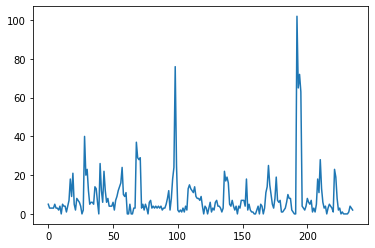

In [34]:
plt.axes().plot(Epilepsy_seizure_rate)